In [7]:
from pipeline import Pipeline

In [8]:
import numpy as np
import h5py
from matplotlib import pyplot as plt
from pathlib import Path
from cellpose import models, utils, plot

In [9]:
import IPython

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
# Open the HDF5 file
DATA_FOLDER = Path("w:/")
filepath = DATA_FOLDER / "sample01.pre"
file = h5py.File(filepath, 'r')

# Access the dataset
amplitude = file['amplitude/images']
phase = file['phase/images']

img_idx = range(2,3)

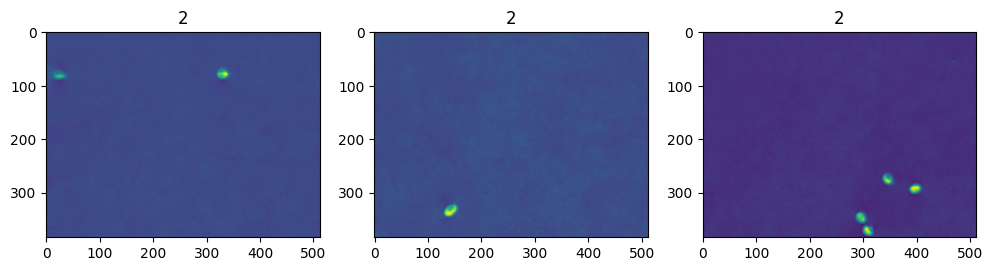

In [52]:
#Choose the images you want to display
image_indices = [0,1,2]  # Replace with the indices of the images you want to display

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Display the selected images
for i, index in enumerate(image_indices):
    image = phase[index, :, :]
    axes[i].imshow(image)
    axes[i].set_title(f'2')


In [53]:
phase_img = []
amplitude_img = []
for i in img_idx:
    phase_img.append(phase[i])
    amplitude_img.append(amplitude[i])

segmentation_algorithm = 'thresholding'
classification_model = 'SVC'

pipe = Pipeline(phase_img, amplitude_img, segmentation_algorithm, classification_model)

In [54]:
y_pred, prob = pipe.process_data()

Extracting features: 100%|██████████| 1/1 [00:00<00:00, 11.36image/s]


In [55]:
#outlines = pipe.get_outlines()


In [56]:
print(f'Predicted label: {y_pred}')
print(prob)

Predicted label: ['uncertain', 'rbc', 'uncertain']
[[4.43667738e-01 7.20826950e-03 9.86707597e-04 4.80494038e-01
  6.76432476e-02]
 [3.82549528e-02 4.58334045e-03 3.84324393e-04 9.10777931e-01
  4.59994512e-02]
 [4.21969159e-01 3.70085996e-03 4.07147124e-05 5.71578902e-01
  2.71036446e-03]]
